In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [2]:
X, y

(array([[0.53881121],
        [0.02211523],
        [0.64127088],
        [0.30497516],
        [0.54815706],
        [1.04619551],
        [0.45555178],
        [0.72041944],
        [1.83039129],
        [1.13582027],
        [0.28710789],
        [0.01817251],
        [0.05198409],
        [1.61253224],
        [1.33169739],
        [0.5661363 ],
        [1.6865051 ],
        [1.6545924 ],
        [1.00931369],
        [1.02903598],
        [0.86105064],
        [0.04219748],
        [0.57231081],
        [0.27991977],
        [0.20313985],
        [0.65897835],
        [1.04583775],
        [0.59295449],
        [1.73555387],
        [0.66710929],
        [1.72522264],
        [1.03276977],
        [0.43291331],
        [1.19270996],
        [0.51767963],
        [0.39854204],
        [0.75248064],
        [1.90063652],
        [0.23021188],
        [1.52231659],
        [0.69709986],
        [1.85679879],
        [0.61471785],
        [0.48790643],
        [1.71690716],
        [1

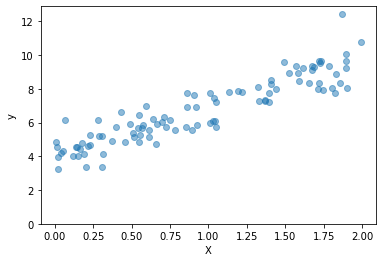

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.scatter(X, y, alpha=0.5)
plt.ylim(0,)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [4]:
X_b = np.c_[np.ones((100,1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.04933082],
       [2.85583279]])

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.04933082],
       [9.76099639]])

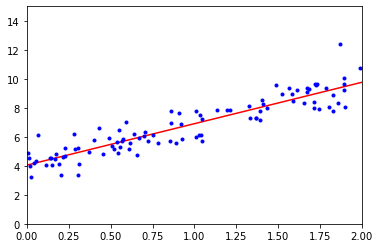

In [6]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.04933082]), array([[2.85583279]]))

In [8]:
lin_reg.predict(X_new)

array([[4.04933082],
       [9.76099639]])

In [9]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best

array([[4.04933082],
       [2.85583279]])

In [10]:
np.linalg.pinv(X_b).dot(y)

array([[4.04933082],
       [2.85583279]])

In [11]:
# Batch Gradient Descend
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialisation
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[4.04933082],
       [2.85583279]])

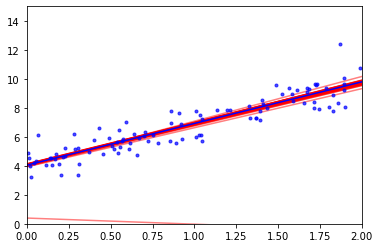

array([[4.05072318],
       [2.87062725]])

In [12]:
# Stochastic Gradient Descend

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)  # random initialisation

for epoch in range(n_epochs):
    y_predict_sgd = X_new_b.dot(theta)
    plt.plot(X_new, y_predict_sgd, "r-", alpha=0.5)
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        
y_predict_sgd = X_new_b.dot(theta)
plt.plot(X, y, "b.", alpha=0.7)
plt.plot(X_new, y_predict_sgd, "b-")
plt.axis([0, 2, 0, 15])
plt.show()

theta

In [13]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([3.99222558]), array([2.79861419]))

In [14]:
# Polynomial Regression

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

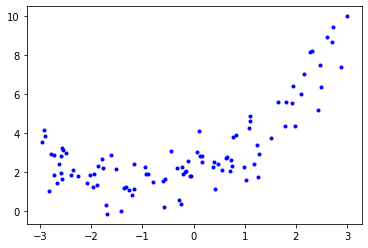

In [15]:
plt.plot(X, y, "b.")
plt.show()

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([2.15151185]), array([2.15151185, 4.62900326]))

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.90121865]), array([[1.01600812, 0.47759861]]))

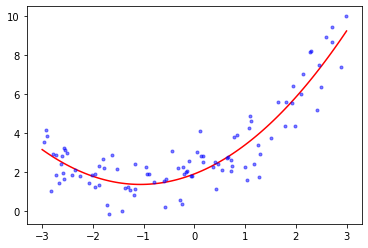

In [18]:
X_plot = np.linspace(-3, 3, 100).reshape(-1,1)
X_plot_poly = poly_features.fit_transform(X_plot)
y_plot = lin_reg.predict(X_plot_poly)

plt.plot(X_plot_poly[:,0], y_plot, "r-")
plt.plot(X, y, "b.", alpha=0.5)
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")


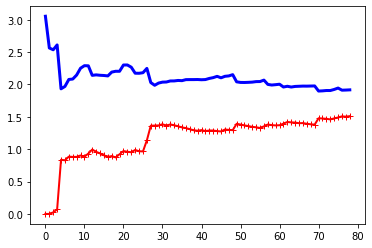

In [20]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [21]:
# Ridge regression

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.56181148]])

In [22]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.51096436])

In [23]:
# Lasso regression

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.50712227])

In [24]:
sgd_reg = SGDRegressor(penalty="l1")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.53669857])

In [25]:
# Elastic Net

from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.51245329])

In [26]:
# Early stopping

from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# prepare the data
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train, X_val, y_train, y_val = train_test_split(X, y.ravel(), test_size=0.2)

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
        
best_epoch

555

In [27]:
# Logistic regression

from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [28]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(int)  # 1 if Iris virginica, else 0

In [29]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

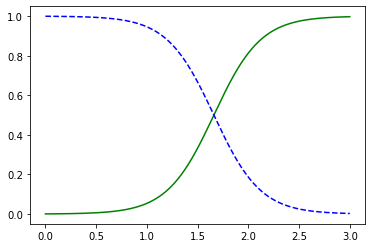

In [30]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")